# Einfache Lineare Regression (ERL)
Dieses Skript liest einen einzelnen Sensorwert (Distanz, Analog ...) über ein Raspberry Pi aus und speichert diesen ab. Die so gesammelten Werte werden einer **Einfachen Regressionsanalyse (ERL)** unterzogen.

Kurz gesagt, passt (fittet) die ERL ein Lineares Modell $Y$ mit Fehler $\varepsilon$ in eine Punktwolke (Sensorwerte). Das Modell wird mathematisch wie folgt dargestellt:
$$
Y = c_0 + c_1 \cdot x + \varepsilon
$$

Die Koeffizienten $c_0$ und $c_1$ müssen daher ermittelt werden, um die Sensorwerte in Zukunft sinnvoll verrechnen zu können.

<img src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="200"/>

## Sensorwert Lesen
In diesem Abschnitt wird über die Netzwerkverbindung ein Skript auf dem Raspberry Pi ausgeführt, welches den gewünschten Sensorwert zurückgibt.

In [1]:
simulation = True # otherwise 'False'
_noise_gain = 0.5
#
import random # used for simulation only
#
try:
    x=float(input())
    x=round(x, 3)
    #
    if(simulation == False):
        _sens_val = !sshpass -p "muffin" ssh -tq -o StrictHostKeyChecking=false -o UserKnownHostsFile=/dev/null  stud@10.180.254.107 'python getVal.py'
    else:
        #_sens_val = ['10'] # SSH FORMAT
        _sens_val = x + _noise_gain*random.uniform(-1.0, 1.0)
        _sens_val = round(_sens_val, 3)
    #
    print("Eingestellter Wert: " + str(x))
    print("Vom Sensor:         " + str(_sens_val))
#
except ValueError:
    print("Bitte numerischen Wert eingeben.")
    exit(0)

6
Eingestellter Wert: 6.0
Vom Sensor:         5.561


## Werte Abspeichern

In [2]:
_file="measurement.csv"
_entry = [x , _sens_val]
#
import csv
#
with open(r"%s" % _file , "a" ) as _f: 
    writer = csv.writer(_f)
    writer.writerow(_entry)

## Koeffizienten bestimmen

In [3]:
print("Coming soon.")

Coming soon.


## Darstellung der Daten

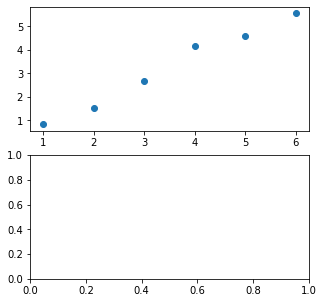

In [5]:
import matplotlib.pyplot as plt
import csv
from numpy import genfromtxt
import numpy
#
try:
    _data = genfromtxt(_file, delimiter=',')
    _d_len = numpy.size(_data,0)
    if(_d_len > 2):
        fig, axs = plt.subplots(2, 1, figsize=(5, 5))
        axs[0].scatter(_data[:,0], _data[:,1])
        
#        
except IOError:
    print("File not found.")